# Data Mining and Machine Learning - Assignment questions 1 to 3

> Topics Covered: Data Cleaning, Exploratory Data Analysis, Visualization and Regression 

**Due: Oct 23 @23.59 (Lausanne Time)**


This assignment is the opportunity to apply the different concepts seen in class so far to a new dataset on the life expectancy.

Run the first few cells to load the dataset and then get started with the questions! **Pay attention:** in order to start working, open the notebook in Colab, and make sure to make a copy of the notebook in your private Google Drive. After you finished, export the notebook as a .ipynb file and upload it on Moodle (Section "Assignment").

To complete the assignment you have to do ***both***:

1. Complete the exercises and submit your Python notebook
2. Answer the questions to the quiz on Moodle
>Note: You can only complete the quiz one time. Have your notebook with the answers ready for answering the quiz. The quiz will be made available Monday 10th October at 7p.m.

Only the quiz questions accounts for your grade. Nevertheless, the answers to the quiz should be supported by your code in the notebook. If they are not, you will not receive points for them. 

**IMPORTANT!** You can discuss the questions with other students but **do not exchange code!** This is individual work. We will run your code and check for similarities. In case of high similarity scores between two notebooks, both the authors will get 0 points for the assignment.

You can post your questions in slack channel #assignments.


If there is need for further clarifications on the questions, after the assignment is released, we will update the file on GitHub, so make sure you check the git repo of the class for updates.

Good luck!

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/Assignment/Assignment_Q1_to_Q3_2022/Assignment_Q1_to_Q3_2022.ipynb)






In [ ]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import math

%matplotlib inline
sns.set_style("whitegrid")


In [ ]:
# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/Assignment/Assignment_Q1_to_Q3_2022/Life%20Expectancy%20Data.csv")


For this assignment, we use data gathered by the WHO (World Health Organization) regarding many countries, over several years. The dataset includes information on items purchased from this store, including for each item or article:
* **Country**
* **Year**: year of the measurement
* **Status**: Developed or Developing status
* **Life expectancy**: Life Expectancy in years
* **Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* **Alcohol**: Alcohol, recorded per capita (individuals aged 15+) consumption (in litres of pure alcohol)
* **Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* **Measles**: Measles - number of reported cases per 1000 population
* **BMI**: Average Body Mass Index of entire population
* **under-five deaths**: Number of under-five deaths per 1000 population
* **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%)
* **Total expenditure**: General government expenditure on health as a percentage of total government expenditure (%)
* **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* **HIV/AIDS**: Deaths per 1 000 live births HIV/AIDS (0-4 years)
* **GDP**: Gross Domestic Product per capita (in USD)
* **Population**: Population of the country
* **thinness 1-19 years**: Proportion of thinness among children and adolescents for Age 10 to 19 (in %)
* **thinness 5-9 years**: Proportion of thinness among children for Age 5 to 9 (in %)
* **Income composition of resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* **Schooling**: Number of years of schooling

## 1. Understand and Clean the Dataset
### 1.1 Initial exploration

>1.1.1 Show the first 5 or 10 rows to get an idea of the data. 

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


>1.1.2 How many observations (rows) and columns are in the dataset?

In [ ]:
print("There is %d entries and %d columns" % (df.shape[0],df.shape[1]))

There is 2938 entries and 22 columns


> 1.1.3 For which variable(s), if any, are there missing/null values?

In [ ]:
# good ressource : https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

df.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                     True
Adult Mortality                     True
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
 HIV/AIDS                          False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool

>1.1.4 Apply two small modifications to the names of the columns, that will help you avoid errors. 
* Remove spaces from beginning and end of the names of the features, if they have some
* Put all the feature names start with an uppercase letter or all with a lowercase letter

In [ ]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()

df.head()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


>1.1.5 Drop the following columns (we will not need them):
* Adult Mortality
* Alcohol
* Under-five deaths 
* Total expenditure
* Diphtheria
* Thinness  1-19 years
* Thinness 5-9 years
* Income composition of resources

In [ ]:
df = df.drop(columns = ['adult mortality', 'alcohol', 'under-five deaths', 'total expenditure', 'diphtheria', 'thinness  1-19 years', 'thinness 5-9 years', 'income composition of resources'])

>1.1.6 Which state had the highest **life expectancy** in a single year? ONLY for this question and the following one (1.1.7), you will need to drop the rows that have NaN as life expectancy.

In [ ]:
df2 = df.dropna(subset=['life expectancy'])
max_le = df2['life expectancy'].max()
df2[['country', 'life expectancy']].loc[df2['life expectancy'] == max_le]

,country,life expectancy
241,Belgium,89.0
915,Finland,89.0
937,France,89.0
938,France,89.0
995,Germany,89.0
1293,Italy,89.0
1850,New Zealand,89.0
1916,Norway,89.0
2056,Portugal,89.0
2433,Spain,89.0


>1.1.7 Which state had the highest **life expectancy** on average over all the years covered by the dataset?

In [ ]:
grouped = df2.groupby('country')['life expectancy'].mean()

grouped.nlargest(1)

country
Japan    82.5375
Name: life expectancy, dtype: float64

>1.1.8 What percentage of developing countries have GDP per capita (averaged over the period) higher than 1000? Drop countries with missing GDP for this question. Round up to 3 decimal points. ONLY for this question, you will need to drop the rows that have NaN as GDP.


In [ ]:
developing = df.dropna(subset=['gdp'])
developing = developing.loc[developing['status'] == 'Developing'].groupby('country').mean()

In [ ]:
developing_above1000 = developing.loc[developing['gdp'] > 1000]

developing_count = developing.shape[0]
developing_above1000_count = developing_above1000.shape[0]

ratio = developing_above1000_count/developing_count


print(f"{ratio * 100:.3f}%")


65.185%


### 1.2 Data types

>1.2.1. List the different features and their data type. ¶


In [ ]:
df.dtypes

country                    object
year                        int64
status                     object
life expectancy           float64
infant deaths               int64
percentage expenditure    float64
hepatitis b               float64
measles                     int64
bmi                       float64
polio                     float64
hiv/aids                  float64
gdp                       float64
population                float64
schooling                 float64
dtype: object

>1.2.2. Are there any duplicated entries?

In [ ]:
df[df.duplicated()].any()

country                   False
year                      False
status                    False
life expectancy           False
infant deaths             False
percentage expenditure    False
hepatitis b               False
measles                   False
bmi                       False
polio                     False
hiv/aids                  False
gdp                       False
population                False
schooling                 False
dtype: bool

>1.2.3. Change the data type for the following columns: Country (from object to string), Status (from object to category)


In [ ]:
df['country'] = df['country'].astype('string')
df['status'] = df['status'].astype('category')
df.dtypes

country                     string
year                         int64
status                    category
life expectancy            float64
infant deaths                int64
percentage expenditure     float64
hepatitis b                float64
measles                      int64
bmi                        float64
polio                      float64
hiv/aids                   float64
gdp                        float64
population                 float64
schooling                  float64
dtype: object

>1.2.4. For which period have these data samples been collected? (i.e, the oldest and the most recent entries in the dataset)

In [ ]:
print(df['year'].min())
print(df['year'].max())

2000
2015



## 2. Exploratory Data Analysis and Visualization

>2.1 Which are the top 5 countries that had the highest **population growth** over the period included in the dataset?
Consider population growth as the difference between the population in the last year and the first year of measurement

>Hint: for each country, the data follows a certain order...

In [ ]:
growth_df = df[(df.year == 2000) | (df.year == 2015)]

growth_df['population'] = growth_df.groupby('country')['population'].diff(periods = -1)

growth_df.sort_values(by=['population'], ascending=False).head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,year,status,life expectancy,infant deaths,percentage expenditure,hepatitis b,measles,bmi,polio,hiv/aids,gdp,population,schooling
1202,Indonesia,2015,Developing,69.1,114,0.0,78.0,15099,27.4,8.0,0.3,3336.166860,237007684.0,12.9
1893,Nigeria,2015,Developing,54.5,483,0.0,49.0,12423,25.4,49.0,3.7,2655.157977,179958215.0,10.0
994,Germany,2015,Developed,81.0,2,0.0,88.0,2464,62.3,94.0,0.1,41176.881580,73465453.0,17.1
2681,Turkey,2015,Developing,75.8,15,0.0,97.0,342,66.1,97.0,0.1,1979.525690,71947351.0,14.5
576,Colombia,2015,Developing,74.8,10,0.0,91.0,1,57.9,91.0,0.1,644.525556,47784739.0,13.6


>2.2 How many unique countries were included in the dataset?

In [ ]:
df.drop_duplicates(subset='country').shape[0]

193

>...Plot the top ten countries by average GDP on a horizontal bar chart.

In [ ]:
avg_gdp = df.groupby(['country'])[['gdp']].mean()
avg_gdp.sort_values(by='gdp', ascending=False, inplace=True)

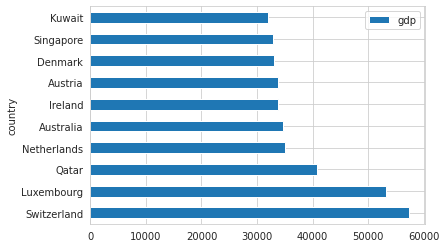

In [ ]:
top10 = avg_gdp.iloc[:10]

top10.plot(kind = 'barh')

>2.3. Sometimes it is useful to group datapoints that share certain common traits. That's what we'll do in this composite question. All the modifications to the dataframe suggested here must be ONLY for the questions 2.3. So we suggest to generate a new dataframe for this question, to avoid affecting the main one.

> 2.3.1 First, aggregate the data by country taking the mean of every numerical feature. At this point you should have 1 row per Country. Keep only the following features: `HIV/AIDS`,`Polio`,`Measles`,`Infant deaths`,`Hepatitis B`. (Remember, you might need the other features after question 2.3, so do not delete them from the main df)

In [ ]:
dff = df.groupby('country')['hiv/aids','polio', 'measles', 'infant deaths', 'hepatitis b'].mean()

dff.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


(193, 5)

> 2.3.2 Then, keep only the following columns, and AFTERWARDS drop all the rows that have NaN values : `HIV/AIDS`,`Polio`,`Measles`,`Infant deaths`,`Hepatitis B`. (Remember, you might need them after question 2.3, so do not delete them from the main df)

In [ ]:
dff.dropna(inplace=True)
dff.shape

(184, 5)

> 2.3.3 Then, build a new column in the dataset with a new composite index, the NHI (New Health Index). It integrates the situation of the country with regards to the HIV/AIDS, Polio, Measles, Infant deaths, Hepatitis B. The higher, the worse the situation. It needs to follow the following formula: $$BHI = 10*HIV + 2*Polio + \sqrt{Measles} + (Infant deaths)^{2} + Hepatitis B$$

In [ ]:
dff['nhi'] = (dff['hiv/aids'] * 10 + dff.polio * 2 + np.sqrt(dff.measles) + dff['infant deaths'] ** 2 + dff['hepatitis b'])
dff

,hiv/aids,polio,measles,infant deaths,hepatitis b,nhi
country,,,,,,
Afghanistan,0.10000,48.3750,2362.2500,78.2500,64.562500,6333.977983
Albania,0.10000,98.1250,53.3750,0.6875,98.000000,303.028476
Algeria,0.10000,91.7500,1943.8750,20.3125,78.000000,719.187054
Angola,2.36875,46.1250,3561.3125,83.7500,70.222222,7259.898956
Antigua and Barbuda,0.12500,96.9375,0.0000,0.0000,98.266667,293.391667
...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0.10000,74.6875,165.0000,9.3750,66.250000,317.360858
Viet Nam,0.14375,94.9375,4232.9375,29.1875,87.538462,1195.822147
Yemen,0.10000,67.1250,2761.1875,39.3750,55.687500,1793.875128


> 2.3.4 After you added the column with the index, create another column, categorical, called "Health risk", which can have 4 different values:
* Very high risk
* High risk
* Medium risk
* Low risk
> You should assign the value to each row depening on the quartile the datapoint belongs to, following the NHI. If it is in the lowest 25%, it needs to be low risk, if it's between 25 and 50%, it will be Medium, between 50 and 75% High risk, between 75% and 100% Very high risk.
Hint: you may want to check the `qcut` function of Pandas.

> Finally, count the values of each class you created. How many datapoints are "High Risk"?

In [ ]:
dff['health risk'] = pd.qcut(dff.nhi, q=4, labels=['Low', 'Medium', 'High', 'Very high'])

print("Low : %d" % dff.loc[dff['health risk'] == 'Low'].shape[0])
print("Medium : %d" % dff.loc[dff['health risk'] == 'Medium'].shape[0])
print("High : %d" % dff.loc[dff['health risk'] == 'High'].shape[0])
print("Very high : %d" % dff.loc[dff['health risk'] == 'Very high'].shape[0])

Low : 46
Medium : 46
High : 46
Very high : 46


>2.4 Compare GDP in 2002 and in 2012. Were there any countries that had a lower GDP with respect to 2002? If so, how many?

In [ ]:
gdp_evol = df[['country', 'year', 'gdp']]
gdp_evol = gdp_evol[(df.year == 2002) | (df.year == 2012)]
gdp_evol['gdp'] = gdp_evol.groupby('country')['gdp'].diff(periods = -1)

gdp_evol

,country,year,gdp
3,Afghanistan,2012,482.113050
13,Afghanistan,2002,NaN
19,Albania,2012,2793.971603
29,Albania,2002,NaN
35,Algeria,2012,3790.488930
...,...,...,...
2903,Yemen,2002,NaN
2909,Zambia,2012,1357.800876
2919,Zambia,2002,NaN
2925,Zimbabwe,2012,898.300126


In [ ]:
gdp_evol.loc[gdp_evol['gdp'] < 0].shape[0]

24

>2.5 Generate a table with the average life expectancy by year for three different groups: 
>* for all developing countries
>* developed countries
>* the overall aggregated values.

>Then, plot the three trends in a line plot with the aggregated values for Life expectancy on y axis and the years on the x axis.


In [ ]:

bystatus = df.groupby(['status', 'year']).mean()[['life expectancy']]

all = df.groupby('year').mean()[['life expectancy']]
ing = bystatus.groupby('status').get_group('Developing').reset_index().set_index('year')['life expectancy']
ed = bystatus.groupby('status').get_group('Developed').reset_index().set_index('year')['life expectancy']


table = pd.concat([all, ing, ed], axis = 1, join='inner', keys=['overall', 'developing', 'developed'])

print(table)

             overall      developing       developed
     life expectancy life expectancy life expectancy
year                                                
2000       66.750273       64.619868       76.803125
2001       67.128962       65.009934       77.128125
2002       67.351366       65.190728       77.546875
2003       67.433333       65.206623       77.940625
2004       67.646448       65.370861       78.384375
2005       68.209290       66.009272       78.590625
2006       68.667760       66.450331       79.131250
2007       69.036066       66.860927       79.300000
2008       69.427869       67.413907       78.931250
2009       69.938251       67.894040       79.584375
2010       70.048634       67.908609       80.146875
2011       70.654098       68.523841       80.706250
2012       70.916940       68.898013       80.443750
2013       71.236066       69.234437       80.681250
2014       71.536612       69.501987       81.137500
2015       71.616940       69.690066       80.

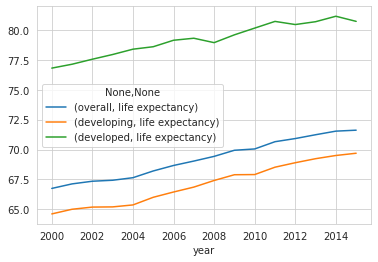

In [ ]:
# Plot
table.plot(kind = 'line')


>2.6 Draw boxplots to compare the BMI (body mass index) between developed and developing countries. Before doing so, aggregate by country and average over time the BMI for each country. Remember to remove Nans. Do developed or developing have a higher median? Which has more outliers?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


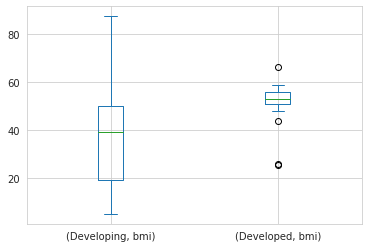

In [ ]:
df_ing = df[['country', 'bmi']].loc[df['status'] == 'Developing'].dropna()
df_ing = df_ing.groupby('country').mean()
  
df_ed = df[['country', 'bmi']].loc[df['status'] == 'Developed'].dropna()
df_ed = df_ed.groupby('country').mean()

plot = pd.concat([df_ing, df_ed], axis=1, keys=['Developing', 'Developed'])
plot.plot(kind='box')

>2.7 Using `folium`, plot on an interactive map the life expectancy of the countries represented in the dataset. You need to have a scale of colors, the more intense the color, the higher the life expectancy of the country.
>
> Only include 2015 data.
>
>A separate geojson file with latitudes and longitudes of the countries needs to be downloaded from [here](https://datahub.io/core/geo-countries). You should use the `folium.Choropleth` method and give the geojson file as `geo_data` parameter. The `key_on` parameter should be set to `"feature.properties.ADMIN"` because of the structure of the json file. Make sure to drop any missing values before plotting your map.






In [ ]:
df15 = df[['country', 'life expectancy']].loc[(df['year'] == 2015)].dropna()

df15.head()

,country,life expectancy
0,Afghanistan,65.0
16,Albania,77.8
32,Algeria,75.6
48,Angola,52.4
64,Antigua and Barbuda,76.4


In [ ]:
import folium
import requests
from pprint import pprint

url = 'https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/Assignment/Assignment_Q1_to_Q3_2022/countries.geojson'
geo_data = requests.get(url).json()

m = folium.Map(location=[0,0], zoom_start=2)
folium.Choropleth(
    geo_data=geo_data,
    name="choropleth",
    data=df15,
    columns=["country", "life expectancy"],
    key_on="feature.properties.ADMIN",
    fill_color="BuPu",
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name="Life Expectancy",
).add_to(m)

folium.LayerControl().add_to(m)

m

## Before regression: One Hot Encoding

Before moving on to the regression, we need to transform the categorical variables as dummy variables for the regression. In order to do so, we use a [One Hot Encoder](https://scikit-learn.org/s/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Pay attention: we need to consider "year" as a categorical variable as well, as it is not a continuous one. So the two features that you need to encode are: Year and Status. Add the features to the dataset.
Reminder: when encoding n categories, we need to add n-1 features to avoid multicollinearity - the "Dummy variable trap".

>2.8 How many features does the dataframe have now, after adding n-1 columns for year and m-1 for status, where n and m are respectively the number of categories possible?

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
df3 = pd.get_dummies(df, columns=['status','year'], drop_first=True)
df3.shape

(2938, 28)

## 3. Regression Analysis
### 3.1 Intro to regression

For this section we will try to build a model to predict the life expectancy, given other data regarding a country. Here we are providing the cleaned dataframe for you. The regression dataset is the same you've been working on until now with some additional cleaning. The features available are the following:
* Alcohol
* Schooling
* GDP
* Life expectancy
* Percentage expenditure
* One dummy feature for each year except for 1 (2000,2001,2002,...)
* One dummy feature "Developing" indicating whether the country is a developing one or not

>Load the data.

In [ ]:
nd = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/Assignment/Assignment_Q1_to_Q3_2022/Regression%20Analysis%20Data")

>3.1.1. Generate descriptive statistics

In [ ]:
nd.describe()

,Year,Life expectancy,Alcohol,Percentage expenditure,Gdp,Population,Schooling,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Developing
count,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2.117000e+03,2117.000000,2117.000000,2117.000000,2117.000000,...,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000
mean,2007.004251,68.629003,4.712300,897.159420,6678.433958,1.296805e+07,11.883562,0.066131,0.066604,0.066604,...,0.067076,0.067076,0.066604,0.066604,0.066604,0.066604,0.066131,0.066131,0.066131,0.815305
std,4.321822,9.874433,4.048895,2236.390076,13754.819775,6.294690e+07,3.353225,0.248570,0.249393,0.249393,...,0.250213,0.250213,0.249393,0.249393,0.249393,0.249393,0.248570,0.248570,0.248570,0.388142
min,2000.000000,36.300000,0.010000,0.000000,1.681350,3.400000e+01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,62.100000,0.970000,31.594159,418.292176,1.923120e+05,9.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2007.000000,71.400000,4.080000,126.698109,1461.671957,1.354775e+06,12.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2011.000000,75.400000,7.560000,549.809610,4981.198619,7.295394e+06,14.300000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2015.000000,89.000000,17.870000,19479.911610,119172.741800,1.293859e+09,20.700000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


>3.1.2. Plot the distribution of life expectancy in 2000 and in 2012. Then create a new column equal to the natural logarithm of life expectancy and plot its histogram as well, just for year 2000.

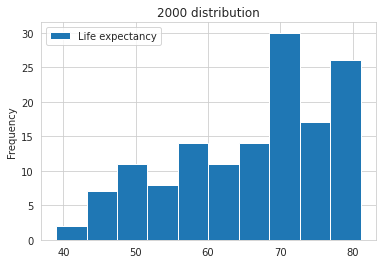

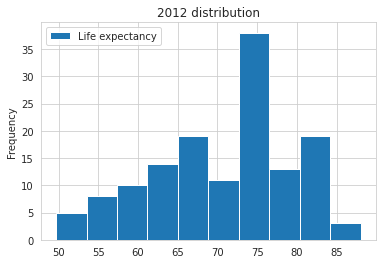

In [ ]:
# YOUR CODE HERE
#Generate the first 2 histograms: 2000 and 2012
plot2000 = nd.loc[(nd['2000'] == True)][['Life expectancy']]
plot2012 = nd.loc[(nd['2012'] == True)][['Life expectancy']]

plot2000.plot.hist(title='2000 distribution')
plot2012.plot.hist(title='2012 distribution')

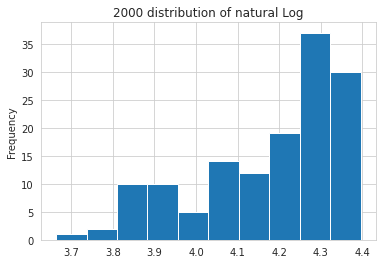

In [ ]:
# YOUR CODE HERE
#Add the new column with the log

#Generate the second histogram: 2000, but with the log
plot2000['Log_le'] = np.log(plot2000['Life expectancy'])

plot2000.Log_le.plot.hist(title='2000 distribution of natural Log')


>3.1.3. Create 3 pairplots with the log of life expectancy on the horizontal axis and on the vertical axis GDP, population, schooling. Which seems to be the best predictor?


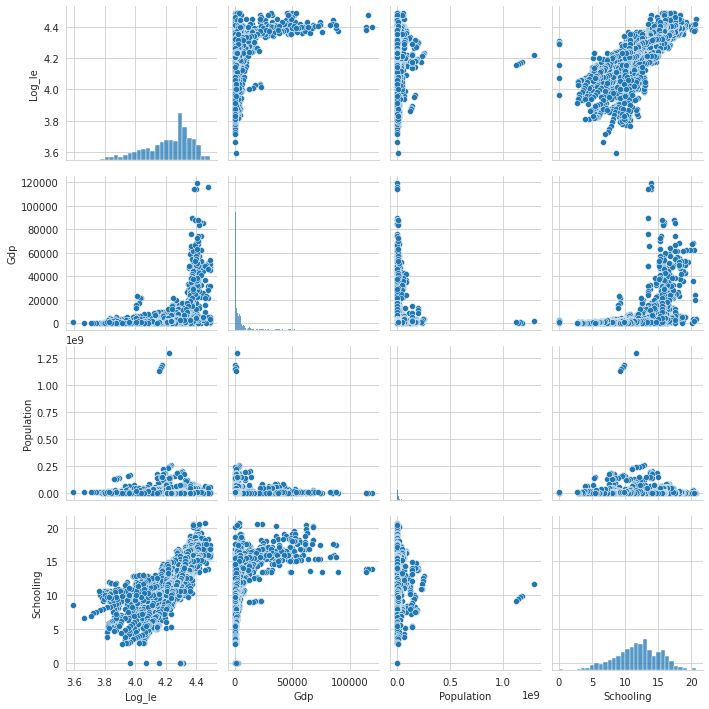

In [ ]:
nd['Log_le'] = np.log(nd['Life expectancy'])
#sns.pairplot(nd.loc[(nd['2000'] == True)][['Log_le', 'Gdp', 'Population', 'Schooling']])

sns.pairplot(nd[['Log_le', 'Gdp', 'Population', 'Schooling']])

## 3.2 Simple Linear Regression

>3.2.1 Drop the feature "Year", since we have hot-encoded it. Regress, using the library `sklearn`, log of life expectancy on Alcohol, gdp, population, percentage expenditure, schooling, Developing, and all the dummy variables for the years.
> 
>Select the dependent (y) and the independent variables (X).

In [ ]:
nd.drop(columns=['Year'], inplace=True)

In [ ]:
features = ['Alcohol', 'Gdp', 'Population', 'Percentage expenditure','Schooling', 'Developing', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014']

X = nd[features]
y = nd['Log_le']

>3.2.2 Split your dataset into a training set (80%) and a test set (20%). Use sklearn.model_selection.train_test_split() and set the **random_state to 42.**

In [ ]:
X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

>3.2.3 Train a linear regression model on the training data. What is the R^2 score for the test data?

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

r2 = r2_score(y_test, prediction)
print("R^2 %.4f" % r2)

R^2 0.5696


>3.2.4. Predict what would be the life expectancy of a (very small) country with an Alcohol consumption of 5 liters, GDP per capita of 800 dollars, a population of 300 individuals, 62 as percentage expenditure, 8 as schooling in year 2000. It is not a developing country.

In [ ]:
#Method in course
vals = [[5, 800, 300, 62, 8, 0, 1, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0]]

tmp = pd.DataFrame(vals, columns = X_train.columns)
y_pred = math.exp(model.predict(tmp))

print("pred: %.0f" % y_pred)

pred: 62


In [ ]:
#method internet
vals2 = [5, 800, 300, 62, 8, 0, 1, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0]
tmp = np.array(vals2).reshape(-1, 21)
#tmp = pd.DataFrame(vals, columns = X_train.columns)
y_pred = math.exp(model.predict(tmp))

y_pred

#print(f"The predicted value is {y_pred:.2f}")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


62.49550245289288

## 3.3 Linear Regression with Standardization

> 3.3.1. Apply a standard scaler to the following columns: Alcohol, gdp, population, percentage expenditure, schooling
> 
> Hint: use the scaler on the already split data. Fit-transform the scaler on X_train and apply transform on X_test.

In [ ]:
ss = StandardScaler()
num_cols = ['Alcohol', 'Gdp', 'Population', 'Percentage expenditure','Schooling']
preprocessor = ColumnTransformer([("standardization", ss, num_cols)], remainder="passthrough")

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

encoded_X_train = preprocessor.fit_transform(X_train)
encoded_X_train = pd.DataFrame(encoded_X_train, columns = X_train.columns) #back to df

encoded_X_test = preprocessor.transform(X_test)
encoded_X_test = pd.DataFrame(encoded_X_test, columns = X_test.columns)

> 3.3.2 Train a linear regression model with the standardised data. What is the R^2 score for the test data?

In [ ]:
lr = LinearRegression()
lr.fit(encoded_X_train,y_train)
prediction = lr.predict(encoded_X_test)
r2 = r2_score(y_test, prediction)
r2
print("R^2 %.4f" % r2)

R^2 0.5696


> 3.3.3 With the new model, predict, as before, what would be the life expectancy of a (very small) country with an Alcohol consumption of 5 liters, GDP per capita of 800 dollars, a population of 300 individuals, 62 as percentage expenditure, 8 as schooling in year 2000. It is not a developing country.

In [ ]:
#vérifier !!

vals = [[5, 800, 300, 62, 8, 0, 1, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0]]
tmp = pd.DataFrame(vals, columns = X_train.columns)
encoded_vals = preprocessor.transform(tmp)
y_pred2 = math.exp(lr.predict(encoded_vals))

print(f"The predicted value is {y_pred2:.4f}")

The predicted value is 62.4955


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


>3.3.4 Looking at the coefficients from the linear regression with standardization, identify which variable is the one with the strongest impact on the dependent variable.

In [ ]:
#TO CHECK
coef_test = lr.fit(encoded_X_test,y_test)

print(coef_test.coef_)
print(encoded_X_test.columns)

[-0.02910883  0.02011855 -0.00518723 -0.00223595  0.1177834  -0.04534229
  0.03228168  0.04093478  0.01176478  0.06938402  0.06554415  0.05576734
  0.03474833  0.04183126  0.04979888  0.0380231   0.03453174  0.05461869
  0.03529411  0.05115039  0.05534517]
Index(['Alcohol', 'Gdp', 'Population', 'Percentage expenditure', 'Schooling',
       'Developing', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
      dtype='object')


> 3.3.5 Calculate the adjusted R-squared and identify the optimum regression coefficients using linear regression with standardisation. 
>
> Hint: calculate the adjusted R-squared for the full model with linear regression and standardisation (as above). The try dropping either one of the columns: `GDP`, `Population` and all the year features and recalculate adjusted R-squared for every new model. Identify which combination of features gives the highest adjusted R-squared. 
>
>Check out this documentation file on the [adjusted R-squared](https://www.statology.org/adjusted-r-squared-in-python/).
>
> Remember to use 42 as the **random_state**

In [ ]:
#ALL
features = ['Alcohol', 'Gdp', 'Population', 'Percentage expenditure','Schooling', 'Developing', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014']

X = nd[features]
y = nd['Log_le']

X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
num_cols = ['Alcohol', 'Gdp', 'Population', 'Percentage expenditure','Schooling']

lr = LinearRegression()
ss = StandardScaler()
preprocessor = ColumnTransformer([("standardization", ss, num_cols)], remainder="passthrough")

encoded_X_train = preprocessor.fit_transform(X_train)
encoded_X_train = pd.DataFrame(encoded_X_train, columns = X_train.columns) 
encoded_X_test = preprocessor.transform(X_test)
encoded_X_test = pd.DataFrame(encoded_X_test, columns=X_test.columns)

lr.fit(encoded_X_train,y_train)
prediction = lr.predict(encoded_X_test)
r2 = r2_score(y_test, prediction)
r2_a = 1 - (1-lr.score(encoded_X_test, y_test))*(len(y_test)-1)/(len(y_test)-encoded_X_test.shape[1]-1)

print("R^2 %.4f" % r2)
print("R^2 ajusted %.4f" % r2_a)
r2_a

R^2 0.5696
R^2 ajusted 0.5472


0.5471540609578558

>3.3.6 Train the model when you drop `GDP` and calculate the adjusted R-squared.

In [ ]:
features = ['Alcohol', 'Population', 'Percentage expenditure','Schooling', 'Developing', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014']

X = nd[features]
y = nd['Log_le']

X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
num_cols = ['Alcohol', 'Population', 'Percentage expenditure','Schooling']

lr = LinearRegression()
ss = StandardScaler()
preprocessor = ColumnTransformer([("standardization", ss, num_cols)], remainder="passthrough")

encoded_X_train = preprocessor.fit_transform(X_train)
encoded_X_train = pd.DataFrame(encoded_X_train, columns = X_train.columns) 
encoded_X_test = preprocessor.transform(X_test)
encoded_X_test = pd.DataFrame(encoded_X_test, columns=X_test.columns)

lr.fit(encoded_X_train,y_train)
prediction = lr.predict(encoded_X_test)
r2 = r2_score(y_test, prediction)
r2_a = 1 - (1-lr.score(encoded_X_test, y_test))*(len(y_test)-1)/(len(y_test)-encoded_X_test.shape[1]-1)

print("R^2 %.4f" % r2)
print("R^2 ajusted %.4f" % r2_a)
r2_a

R^2 0.5687
R^2 ajusted 0.5473


0.5473328713944843

> 3.3.7 Train the model when you drop `Population` and calculate the adjusted R-squared. Pay attention: you only need to drop `Population`, you need `GDP` back in there.

In [ ]:
features = ['Alcohol', 'Gdp', 'Percentage expenditure','Schooling', 'Developing', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014']

X = nd[features]
y = nd['Log_le']

X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
num_cols = ['Alcohol', 'Gdp', 'Percentage expenditure','Schooling']

lr = LinearRegression()
ss = StandardScaler()
preprocessor = ColumnTransformer([("standardization", ss, num_cols)], remainder="passthrough")

encoded_X_train = preprocessor.fit_transform(X_train)
encoded_X_train = pd.DataFrame(encoded_X_train, columns = X_train.columns) 
encoded_X_test = preprocessor.transform(X_test)
encoded_X_test = pd.DataFrame(encoded_X_test, columns=X_test.columns)

lr.fit(encoded_X_train,y_train)
prediction = lr.predict(encoded_X_test)
r2 = r2_score(y_test, prediction)
r2_a = 1 - (1-lr.score(encoded_X_test, y_test))*(len(y_test)-1)/(len(y_test)-encoded_X_test.shape[1]-1)

print("R^2 %.4f" % r2)
print("R^2 ajusted %.4f" % r2_a)

R^2 0.5698
R^2 ajusted 0.5484


>3.3.8 Train the model when you drop all the year features and calculate the adjusted R-squared. Pay attention: you only need to drop all the year features, you need `GDP` and `Population` back in there. 

In [ ]:
features = ['Alcohol', 'Gdp', 'Population', 'Percentage expenditure','Schooling', 'Developing']

X = nd[features]
y = nd['Log_le']

X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
num_cols = ['Alcohol', 'Gdp', 'Population', 'Percentage expenditure','Schooling']

lr = LinearRegression()
ss = StandardScaler()
preprocessor = ColumnTransformer([("standardization", ss, num_cols)], remainder="passthrough")

encoded_X_train = preprocessor.fit_transform(X_train)
encoded_X_train = pd.DataFrame(encoded_X_train, columns = X_train.columns)
encoded_X_test = preprocessor.transform(X_test)
encoded_X_test = pd.DataFrame(encoded_X_test, columns=X_test.columns)

lr.fit(encoded_X_train,y_train)
prediction = lr.predict(encoded_X_test)
r2 = r2_score(y_test, prediction)
r2_a = 1 - (1-lr.score(encoded_X_test, y_test))*(len(y_test)-1)/(len(y_test)-encoded_X_test.shape[1]-1)

print("R^2 %.4f" % r2)
print("R^2 ajusted %.4f" % r2_a)
r2_a

R^2 0.5811
R^2 ajusted 0.5751


0.5750519591602758